<img src="https://github.com/tanejalalit/AvacadoMLProject/blob/master/Avacado.jpg?raw=true" width="240" height="360" />

### Avacado Project by Lalit Taneja

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding Avacados Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Applying Regression](#section4)
    - 4.1 [Create Test and Train Data](#section401)<br/> 
    - 4.2 [Linear Regression model](#section402)<br/>
    - 4.3 [Decision Tree Regressor model](#section403)<br/>
    - 4.4 [Random Forest Regressor model](#section404)<br/>
5. [Conclusions](#section5)<br/>

<a id=section1></a>

### 1. Problem Statement

This project is to __predict__ Avacado's average prices from the given dataset. The features based on which the prediction shall be carried out primarily includes volume and bag size. 

<a id=section2></a>

### 2. Data Loading and Description

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


import bokeh as bok

import string
print('Import Packages Done')

Import Packages Done


#### Import Avacado Dataset

In [2]:
# Read csv file
df_avcdo = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')

<a id=section3></a>

### 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding Avacados Dataset

In [3]:
print(df_avcdo.shape)
df_avcdo.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_avcdo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df_avcdo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df_avcdo.describe() #(include='all')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<a id=section302></a>

<a id=section302></a>

### 3.2 Pre Profiling

In [7]:
profile = pandas_profiling.ProfileReport(df_avcdo)
profile.to_file(outputfile="Avacado_before_preprocessing.html")

<a id=section303></a>

### 3.3 Preprocessing

In [8]:
df_avcdo_new = df_avcdo.copy(deep=True)  #Creating a new DataFrame to clean data for analysis

In [9]:
df_avcdo_new.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6745,16,2017-09-10,1.49,215393.25,116267.62,26602.41,5997.25,66525.97,43187.87,23218.10,120.00,conventional,2017,LasVegas
14471,42,2016-03-06,1.82,4095.43,1975.45,548.25,1.74,1569.99,20.00,1549.99,0.00,organic,2016,StLouis
7758,22,2017-07-30,1.41,503413.12,149729.73,306327.51,2243.53,45112.35,42049.24,1129.77,1933.34,conventional,2017,Sacramento
1833,13,2015-09-27,0.99,1542657.96,564480.54,729792.24,14587.65,233797.53,221484.44,10779.94,1533.15,conventional,2015,Plains
16708,6,2017-11-19,2.32,9279.95,131.72,3703.25,93.25,5351.73,5306.40,45.33,0.00,organic,2017,RaleighGreensboro


#### Drop column 'Unnamed: 0' since it represents index, hence not required for analysis

In [10]:
df_avcdo_new.drop('Unnamed: 0', axis = 1,inplace = True)    #Drop column 'Unnamed: 0'
df_avcdo_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Split Date column into Day and Month

In [11]:
df_avcdo_new['Date'] = pd.to_datetime(df_avcdo_new['Date'])
df_avcdo_new['Month'] = df_avcdo_new['Date'].apply(lambda x:x.month) #Create new column 'Month' derived from column 'Date'
df_avcdo_new['Day'] = df_avcdo_new['Date'].apply(lambda x:x.day) #Create new column 'Day' derived from column 'Date'

In [12]:
df_avcdo_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


### Plotting Avocado's Average Price

#### How Average Price is spread with respect to Date ?

Text(0.5,1,'Average Price')

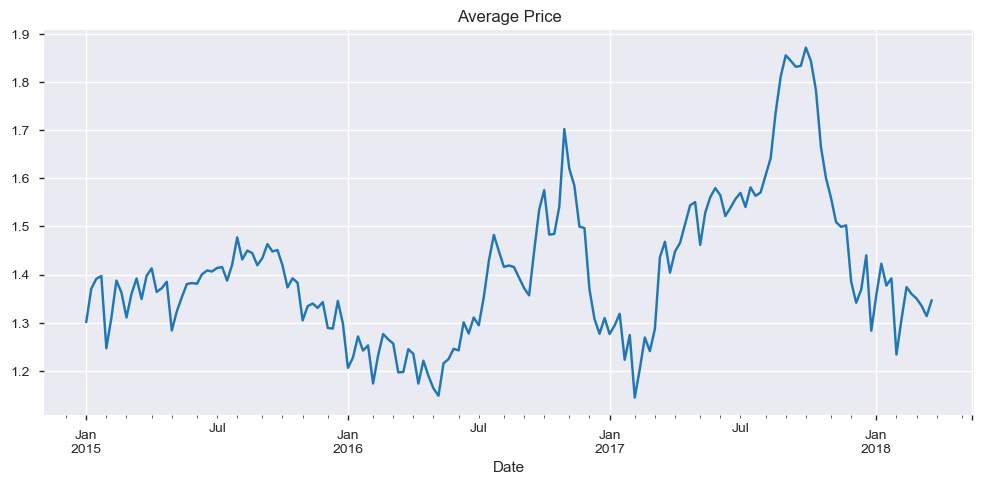

In [13]:
dategroup = df_avcdo_new.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df_avcdo_new.Date)
plt.title('Average Price')

#### How Average Price is spread with respect to Year ?

Text(0.5,1,'Average Price by Year')

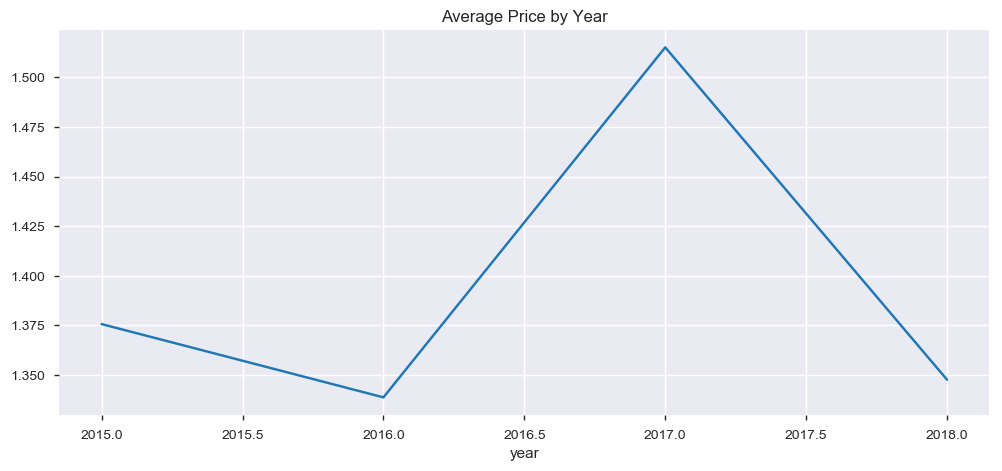

In [14]:
dategroup = df_avcdo_new.groupby('year').mean()
fig, ax = plt.subplots(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df_avcdo_new.year)
plt.title('Average Price by Year')

#### How Average Price is spread with respect to Month ?

Text(0.5,1,'Average Price by Month')

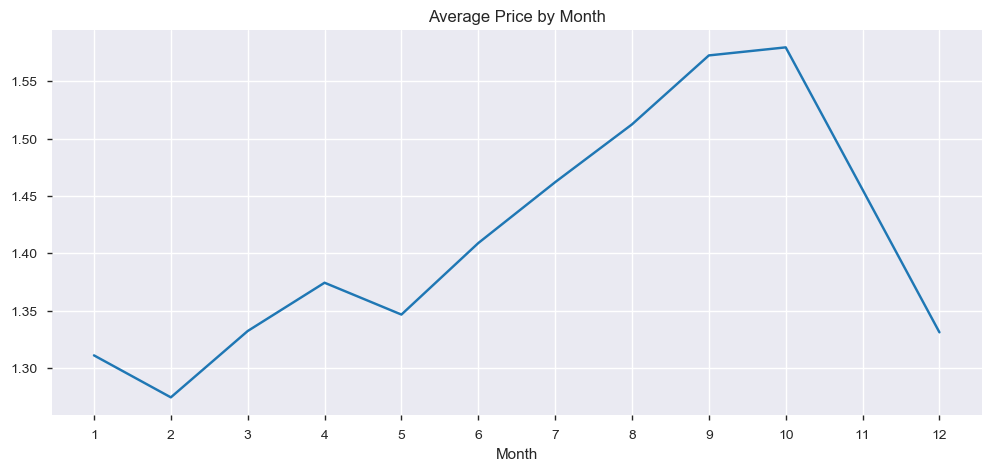

In [15]:
dategroup = df_avcdo_new.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=df_avcdo_new.Month)
plt.title('Average Price by Month')

#### How Avacado observations are spread with respect to type (Conventional or Organic)?

conventional    9126
organic         9123
Name: type, dtype: int64


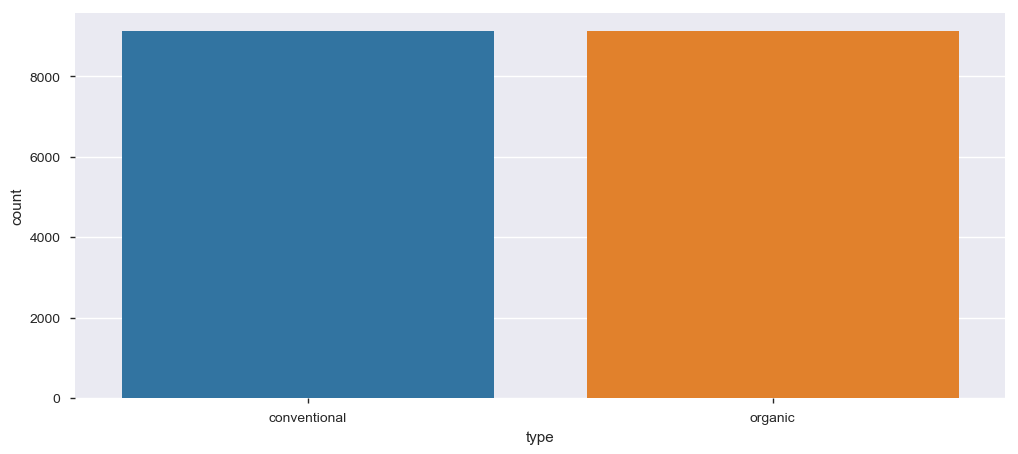

In [16]:
print(df_avcdo_new['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(df_avcdo_new['type'])
plt.show()

#### How Average Price is spread for Small Bags?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



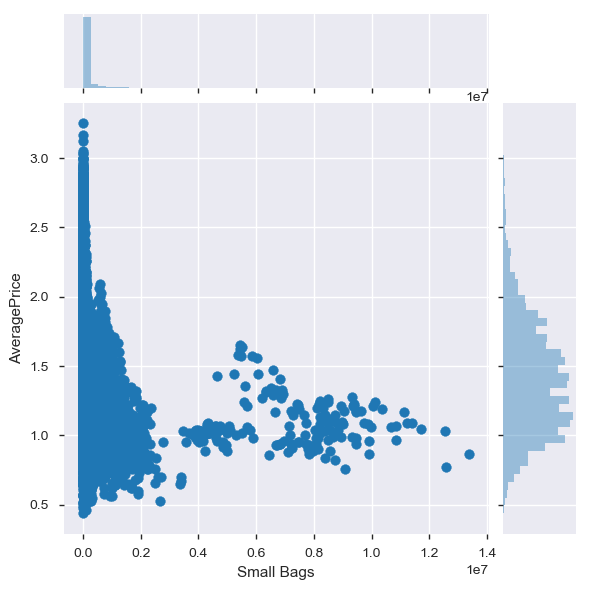

In [17]:
sns.jointplot(x='Small Bags',y='AveragePrice',data=df_avcdo_new)

#### How Average Price is spread for Small Volume (column 4046) ?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



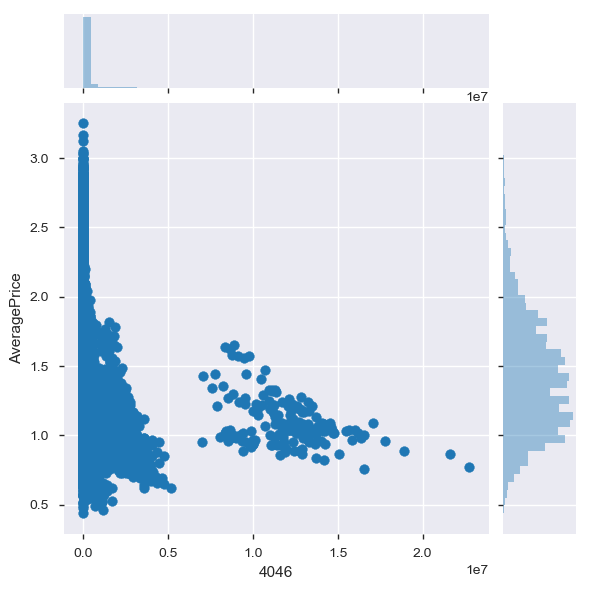

In [18]:
sns.jointplot(x='4046',y='AveragePrice',data=df_avcdo_new)

#### How Average Price is spread for Large Bags?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



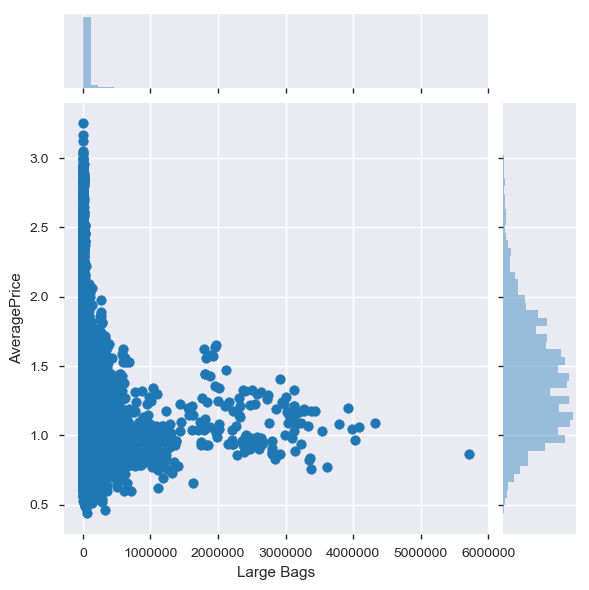

In [19]:
sns.jointplot(x='Large Bags',y='AveragePrice',data=df_avcdo_new)

#### How Average Price is spread for Large Volume (column 4225) ?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



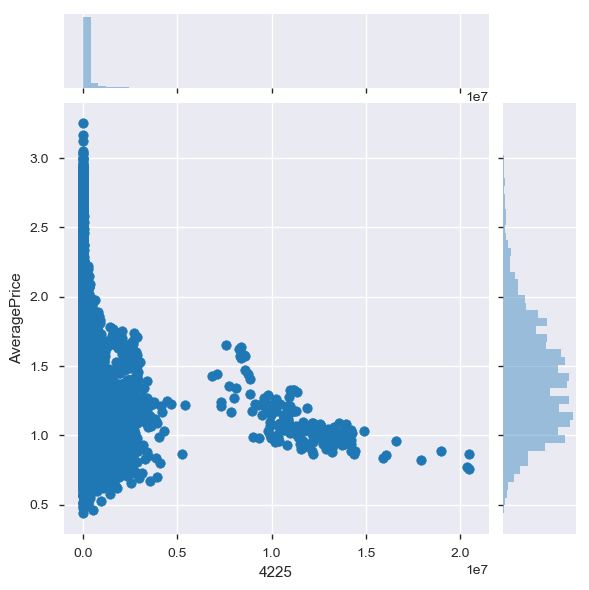

In [20]:
sns.jointplot(x='4225',y='AveragePrice',data=df_avcdo_new)

#### How Average Price is spread for XLarge Bags?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



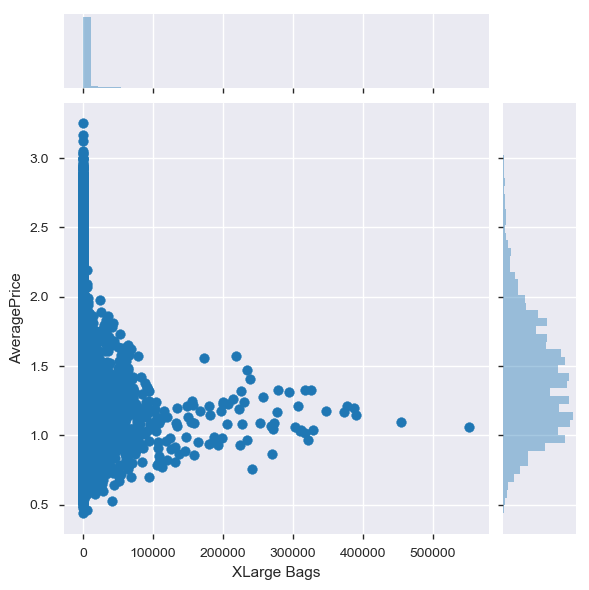

In [21]:
sns.jointplot(x='XLarge Bags',y='AveragePrice',data=df_avcdo_new)

#### How Average Price is spread for XLarge Volume (column 4770) ?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



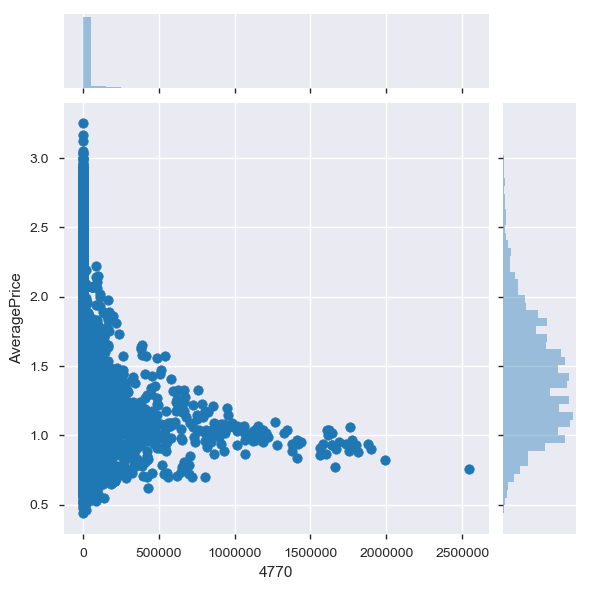

In [22]:
sns.jointplot(x='4770',y='AveragePrice',data=df_avcdo_new)

#### Average Price Distribution Plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



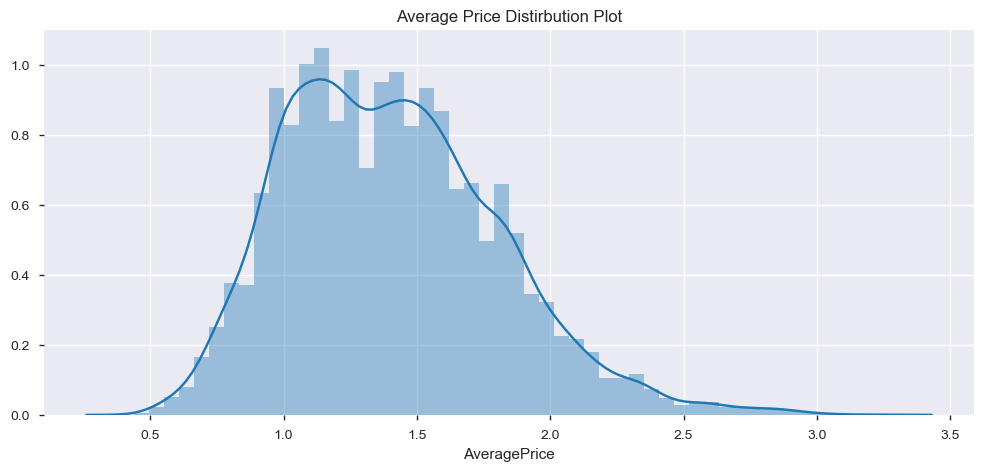

In [23]:
plt.figure(figsize=(12,5))
plt.title("Average Price Distirbution Plot")
ax = sns.distplot(df_avcdo_new["AveragePrice"])

#### Corelation Matrix 

In [24]:
df_avcdo_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


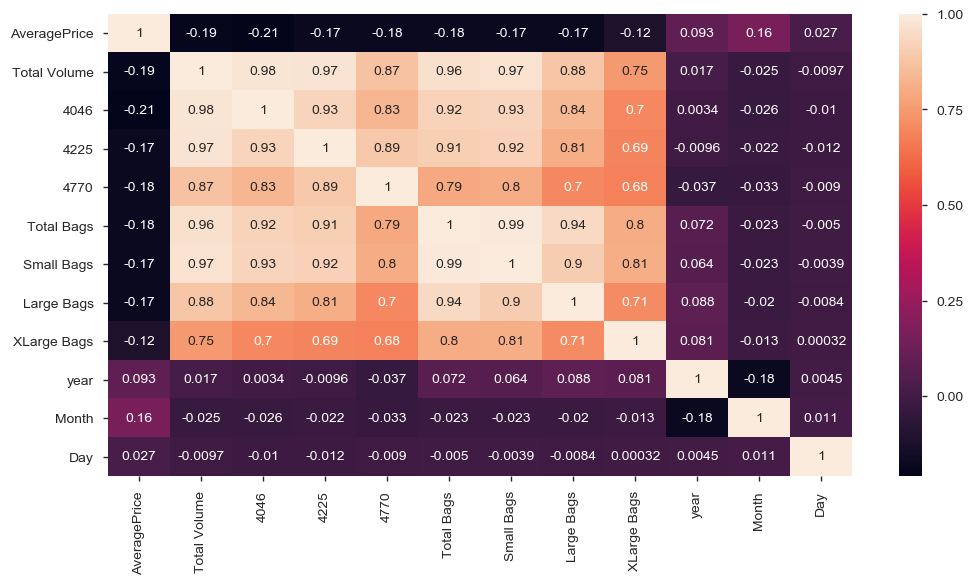

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(df_avcdo_new.corr(), annot=True);

#### Check categorical feature 'region'

In [26]:
print(df_avcdo_new['region'].unique())
print(df_avcdo_new['region'].nunique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
54


#### Check categorical feature 'type'

In [27]:
print(df_avcdo_new['type'].unique())
print(df_avcdo_new['type'].nunique())

['conventional' 'organic']
2


#### Dropping columns 'region' and 'date'

In [28]:
df_avcdo_final = pd.get_dummies(df_avcdo_new.drop(['region','Date'],axis=1),drop_first=True)

In [29]:
df_avcdo_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


<a id=section304></a>

### 3.4 Post Profiling

In [30]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_avcdo_final)
profile.to_file(outputfile="Avacado_post_profiling.html")

<a id=section4></a>

## 4. Applying Regression Models

<a id=section401></a>

### 4.1 Create Test and Train data

#### We will split our data into an X array that contains the predictor variables to train on, and a y array with the target variable.

In [31]:
X = df_avcdo_final.iloc[:,1:14]
y = df_avcdo_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [32]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

NameError: name 'split' is not defined

<a id=section402></a>

### 4.2 Linear Regression model

#### We are applying Linear Regression to the dataset because our Target Variable 'AveragePrice' is continuous.

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
pred = linreg.predict(X_test)

In [38]:
y_pred_train = linreg.predict(X_train)

In [39]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set

In [42]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.23174188208241825
MAE for test set is 0.233008369963113


In [43]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.09107723451592094
MSE for test set is 0.09056304033191488


In [44]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.30179005039252194
RMSE for test set is 0.3009369374668302


#### Observation: Since the RMSE from this model is low, so we can say that we have created a good model. However, we will check to be more sure by plotting the y_test vs the predictions.

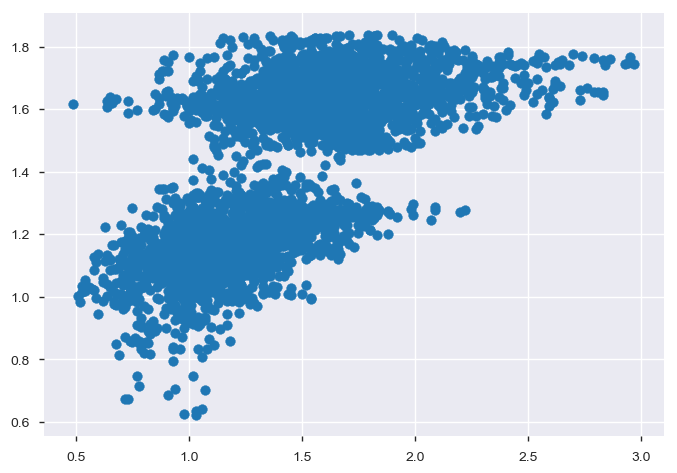

In [45]:
plt.scatter(x=y_test,y=pred)

#### Observation: As we can observe that there is no straight line, so it cannot be ensured that this is the best model that could be applied on our data.

<a id=section403></a>

### 4.3 Decision Tree Regressor model

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0,0.5,'Predicted Y')

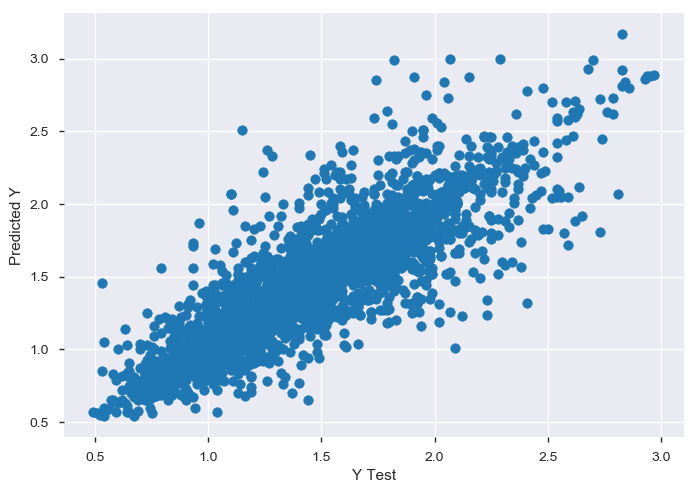

In [47]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Observation: Here we can observe that we nearly have a straight line, and it seems to be better than the Linear Regression Model, and to be more sure we will check the RMSE.

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1329095890410959
MSE: 0.0428132602739726
RMSE: 0.2069136541506447


#### Observation: The RMSE from Decision Tree model is lower than the RMSE we got with Linear Regression model.
#### Now I will try with another model (Random Forest) to see my predictions could be improved for this data.

<a id=section404></a>

### 4.4 Random Forest Regressor model

In [49]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10506465753424657
MSE: 0.022469470684931506
RMSE: 0.14989820107303325


#### Observation: We can observe that the RMSE from Random Forest model is lower than the Linear Regression and Decision Tree models, so the RandomForest is the best model in this case.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



,Y Test,Pred
14192,2.11,1.901
1873,0.98,1.044
7293,1.17,1.150
15087,1.78,1.546
9888,1.61,1.875


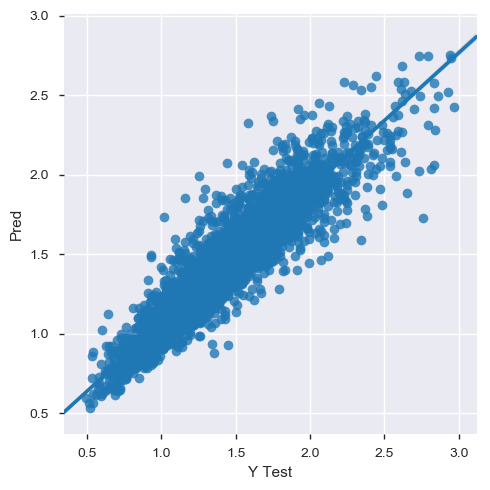

In [52]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

<a id=section5></a>

## 5. Conclusion 

- Based on the various models applied, among Linear Regression, Decision Tree and Random Forest models, __Random Forest model__ seems to be the best fit model in our case, considering the __least RMSE__ among all the models<br/>